In [1]:
from functools import partial
import os

# importing important libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

## Loading the dataset

In [2]:
# load the dataset 
images_dir = '/kaggle/input/satellite-images-dataset/Water Bodies Dataset/Images'
masks_dir = '/kaggle/input/satellite-images-dataset/Water Bodies Dataset/Masks'

dirnames , _, filenames = next(os.walk(images_dir))

In [3]:
len(filenames)

2841

In [4]:
@tf.function
def load_img_with_mask(image_path, images_dir: str = 'Images', masks_dir: str = 'Masks',images_extension: str = 'jpg', masks_extension: str = 'jpg') -> dict:
    # read the images files using tf.io
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)

    # convert images files into mask files
    mask_filename = tf.strings.regex_replace(image_path, images_dir, masks_dir)
    mask_filename = tf.strings.regex_replace(mask_filename, images_extension, masks_extension)
    
    # read the masks image files
    mask = tf.io.read_file(mask_filename)
    mask = tf.image.decode_image(mask, channels=1, expand_animations = False)
    return (image, mask)

## Visualizing the satelite image data

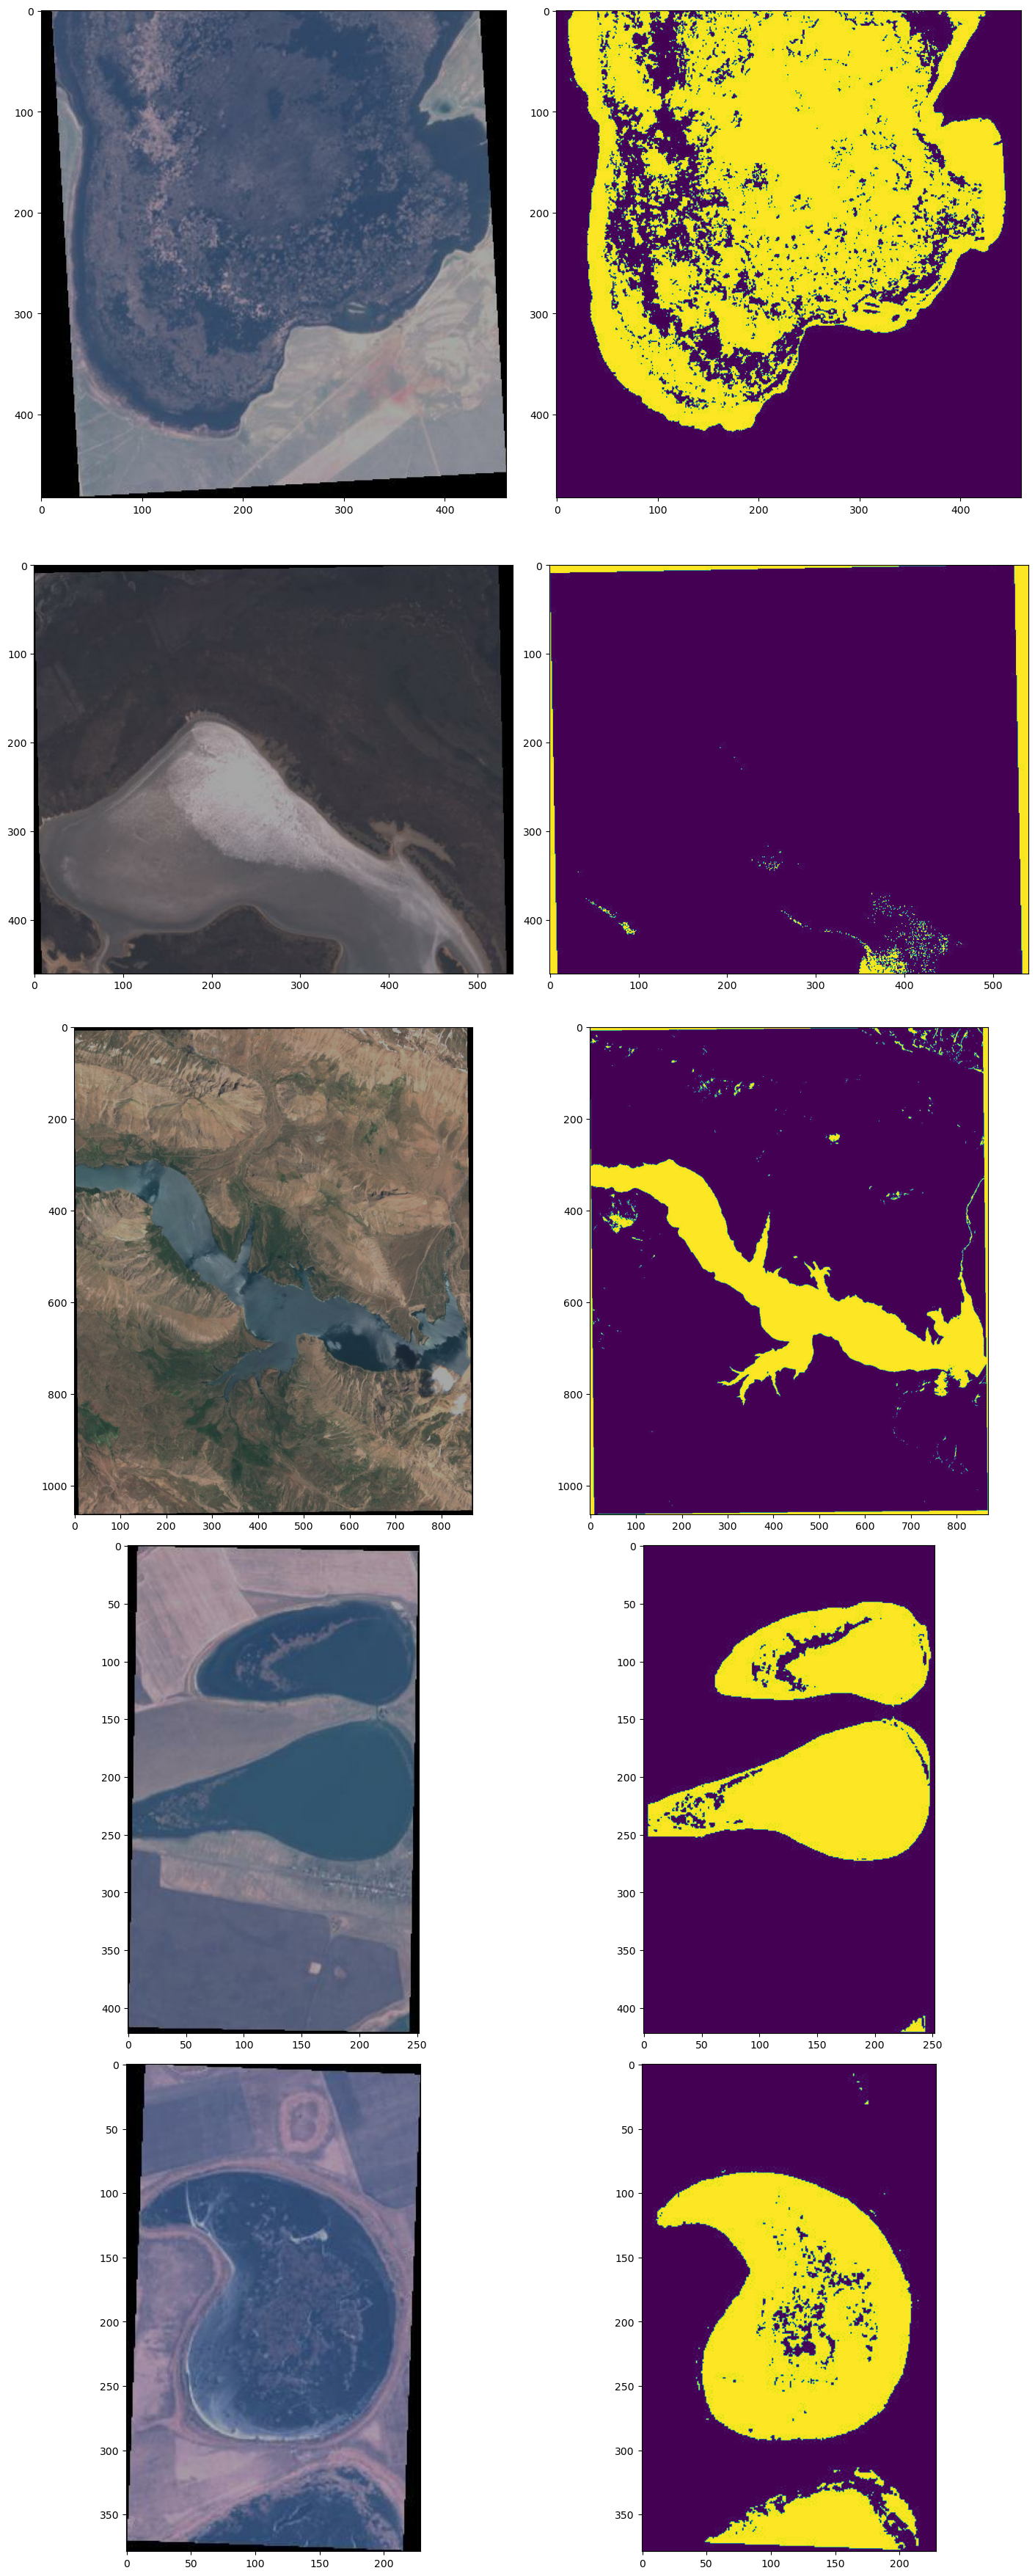

In [5]:
# visualize the some images
n_images = 5
# create list of images and mask using above funtion
examples = [load_img_with_mask(os.path.join(images_dir, filenames[i])) for i in range(n_images)]

# plot the images using matplotlib pyplot
fig, axs = plt.subplots(n_images,2, figsize=(14,n_images*7), constrained_layout=True)
for ax, (img, msk) in zip(axs, examples):
    ax[0].imshow(img)
    ax[1].imshow(msk)

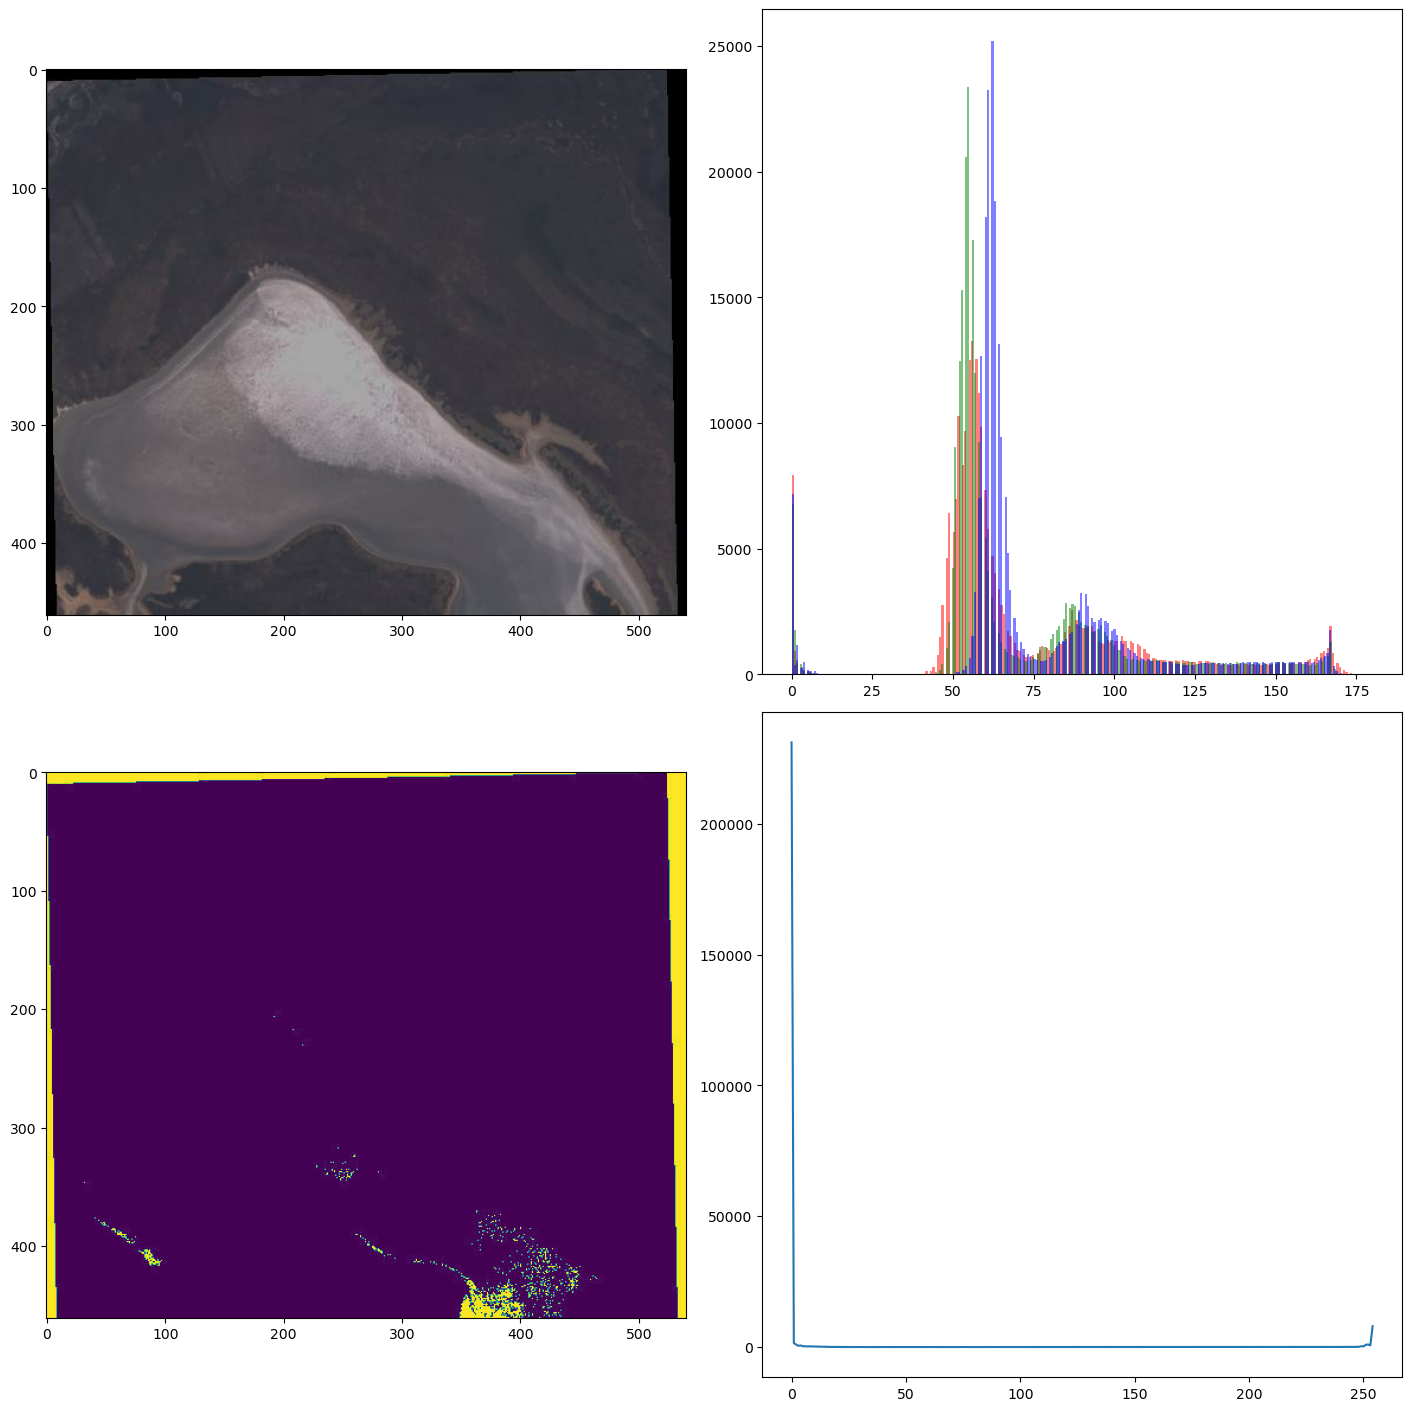

In [7]:
# visualizing the image channels in one example
fig, axs = plt.subplots(2, 2, figsize=(14,14), constrained_layout=True)
example_image, example_mask = examples[1]
example_image = np.array(example_image)
example_mask = np.squeeze(example_mask)
axs[0][0].imshow(example_image)
axs[0][1].hist(example_image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
axs[0][1].hist(example_image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
axs[0][1].hist(example_image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)

axs[1][0].imshow(example_mask)
histogram, bin_edges = np.histogram(example_mask, bins=256)
axs[1][1].plot(bin_edges[0:-1], histogram);

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)